# Predicción de Niveles de Obesidad usando Machine Learning

Este código realiza análisis de datos, preprocesamiento, visualización y modelado para predecir niveles de obesidad.

## Desglose de los Pasos

### 1. Carga y Preprocesamiento de Datos
- Lee un conjunto de datos de obesidad desde un archivo CSV.
- Realiza exploración de datos:
  - Muestra información básica del conjunto de datos, estadísticas descriptivas y verifica valores faltantes.
- Codifica características categóricas.
- Escala características numéricas a un rango común.
- Genera un mapa de calor de correlaciones para visualizar relaciones entre características.
- Elimina valores atípicos en el conjunto de datos.

### 2. Visualización de Datos
- Crea histogramas para visualizar la distribución de las características.
- Utiliza diagramas de caja para detectar y analizar valores atípicos.

### 3. Balanceo de Datos
- Aborda la distribución desigual de los niveles de obesidad (clase desbalanceada) utilizando diferentes técnicas:
  - **RandomOverSampler**: Sobremuestra la clase minoritaria.
  - **RandomUnderSampler**: Submuestrea la clase mayoritaria.
  - **SMOTE**: Crea muestras sintéticas de la clase minoritaria.

### 4. Creación y Evaluación del Modelo
- Construye y entrena dos modelos de machine learning:
  - **Máquina de Vectores de Soporte (SVM)**: Para clasificación.
  - **Red Neuronal Artificial (ANN)**: Para clasificación.
- Divide los datos en conjuntos de entrenamiento y prueba.
- Entrena los modelos utilizando los datos de entrenamiento.
- Evalúa el rendimiento de los modelos con reportes de clasificación y matrices de confusión.
- Guarda el modelo de red neuronal en un archivo `"ann.h5"`.

El objetivo de este código es predecir los niveles de obesidad basándose en diversas características mediante preprocesamiento de datos, visualización de patrones, balanceo de clases y modelado con técnicas de machine learning.

---


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datos/ObesityDataSet.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [ ]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
df.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [ ]:
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df["family_history_with_overweight"] = le.fit_transform(df["family_history_with_overweight"])
df["FAVC"] = le.fit_transform(df["FAVC"])
df["CAEC"] = le.fit_transform(df["CAEC"])
df["SMOKE"] = le.fit_transform(df["SMOKE"])
df["SCC"] = le.fit_transform(df["SCC"])
df["CALC"] = le.fit_transform(df["CALC"])
df["MTRANS"] = le.fit_transform(df["MTRANS"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int64  
 12  FAF                             21

In [ ]:
X = df.drop("NObeyesdad", axis = 1)
y = df["NObeyesdad"]

<Axes: >

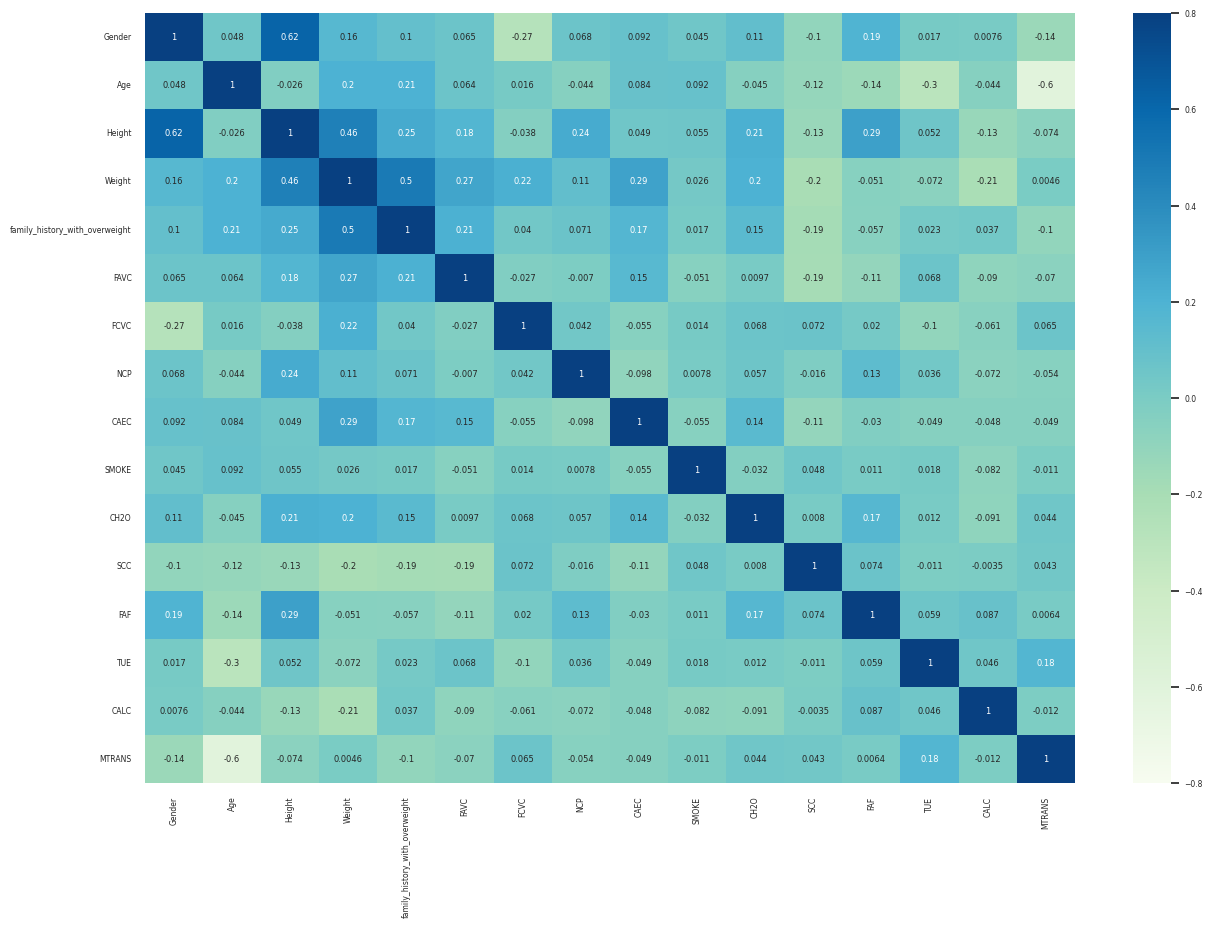

In [ ]:
sns.set(style = "whitegrid", font_scale =0.5)
plt.figure(figsize = (15,10))
sns.heatmap(X.corr(), annot = True, cmap = "GnBu", vmin=-0.8, vmax=0.8)

In [ ]:
df = df.drop("SMOKE", axis = 1)

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'family_history_with_overweight'}>,
        <Axes: title={'center': 'FAVC'}>,
        <Axes: title={'center': 'FCVC'}>,
        <Axes: title={'center': 'NCP'}>],
       [<Axes: title={'center': 'CAEC'}>,
        <Axes: title={'center': 'CH2O'}>,
        <Axes: title={'center': 'SCC'}>, <Axes: title={'center': 'FAF'}>],
       [<Axes: title={'center': 'TUE'}>,
        <Axes: title={'center': 'CALC'}>,
        <Axes: title={'center': 'MTRANS'}>, <Axes: >]], dtype=object)

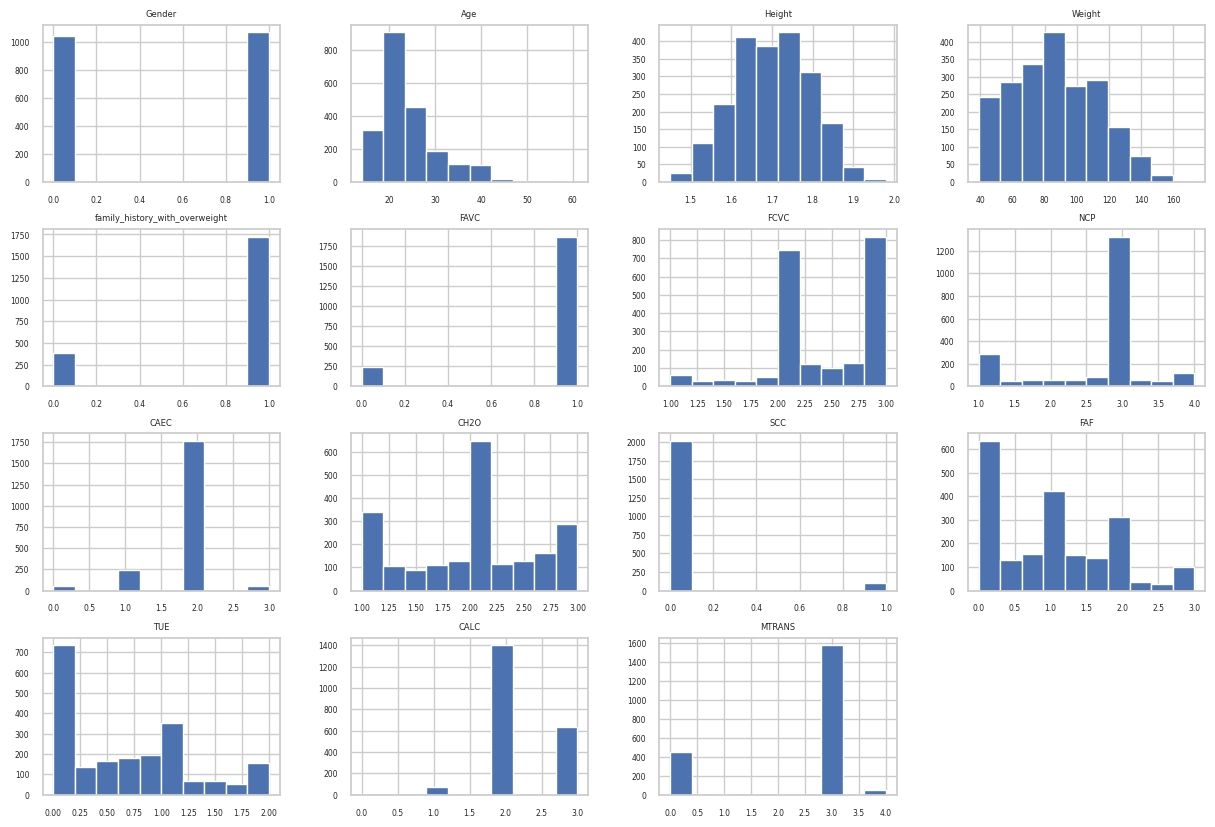

In [ ]:
df.hist(figsize = (15,10))

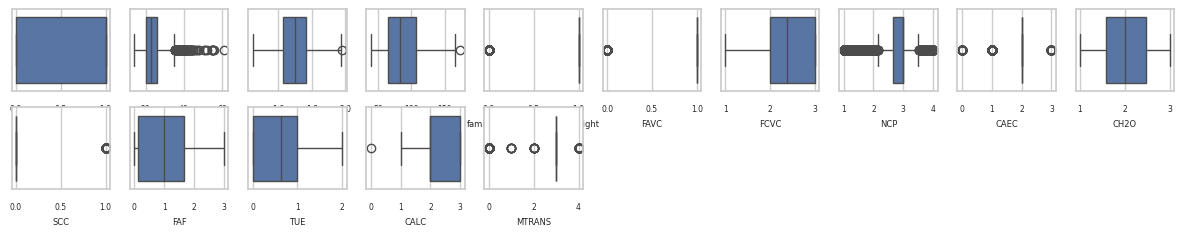

In [ ]:
plt.figure(figsize = (15,10))
c = df.columns[:-1]
for i in enumerate(c):
  plt.subplot(8,10,i[0]+1)
  sns.boxplot(x=i[1], data = df)

In [ ]:
for i in c:
  q1 = df[i].quantile(0.05)
  q4 = df[i].quantile(0.95)
  df[i][df[i] <= q1] = q1
  df[i][df[i] >= q4] = q4

<ipython-input-20-af4e9bc102da>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[i][df[i] <= q1] = q1
<ipython-input-20-af4e9bc102da>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the c

In [ ]:
X = df.drop("NObeyesdad", axis = 1)
y = df["NObeyesdad"]

In [ ]:
y.value_counts()

,count
NObeyesdad,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_I,290
Overweight_Level_II,290
Normal_Weight,287
Insufficient_Weight,272


# Balanceo de datos

In [ ]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X, y)

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

In [ ]:
y_ros.value_counts()

,count
NObeyesdad,
Normal_Weight,351
Overweight_Level_I,351
Overweight_Level_II,351
Obesity_Type_I,351
Insufficient_Weight,351
Obesity_Type_II,351
Obesity_Type_III,351


In [ ]:
y_rus.value_counts()

,count
NObeyesdad,
Insufficient_Weight,272
Normal_Weight,272
Obesity_Type_I,272
Obesity_Type_II,272
Obesity_Type_III,272
Overweight_Level_I,272
Overweight_Level_II,272


In [ ]:
# Agarra caracteristicas para crear unos nuevos
y_smote.value_counts()

,count
NObeyesdad,
Normal_Weight,351
Overweight_Level_I,351
Overweight_Level_II,351
Obesity_Type_I,351
Insufficient_Weight,351
Obesity_Type_II,351
Obesity_Type_III,351


In [ ]:
y

,NObeyesdad
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Overweight_Level_I
4,Overweight_Level_II
...,...
2106,Obesity_Type_III
2107,Obesity_Type_III
2108,Obesity_Type_III
2109,Obesity_Type_III


In [ ]:
def svm_model(X,y):
  scaler = MinMaxScaler()
  X = scaler.fit_transform(X)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)
  SVM = SVC(kernel='linear')# linear, rbf, poly, sigmoid
  SVM.fit(X_train, y_train)
  y_pred = SVM.predict(X_test)
  return classification_report(y_test, y_pred), classification_report(y_train, SVM.predict(X_train)), confusion_matrix(y_test, y_pred)

In [ ]:
crtest_ros, crtrain_ros, cm_ros = svm_model(X_ros, y_ros)
crtest_rus, crtrain_rus, cm_rus = svm_model(X_rus, y_rus)
crtest_smote, crtrain_smote, cm_smote = svm_model(X_smote, y_smote)

In [ ]:
y_ros_ann = pd.get_dummies(y_ros)
y_rus_ann = pd.get_dummies(y_rus)
y_smote_ann = pd.get_dummies(y_smote)

In [ ]:
def ann_model(X,y):
  X = MinMaxScaler().fit_transform(X)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)
  ann = Sequential()
  ann.add(Dense(units=15, activation='relu'))
  ann.add(Dense(units=8, activation='relu'))
  ann.add(Dense(units=7, activation='softmax'))
  ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  ann.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=25, epochs=100)
  loss = pd.DataFrame(ann.history.history)
  plt.figure(figsize=(15, 10))
  sns.lineplot(data=loss, lw=3)
  sns.despine()
  return ann, classification_report(y_test.argmax(axis=1), ann.predict(X_test).argmax(axis=1)), classification_report(y_train.argmax(axis=1), ann.predict(X_train).argmax(axis=1))

Epoch 1/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.1374 - loss: 1.9577 - val_accuracy: 0.1599 - val_loss: 1.9292
Epoch 2/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1774 - loss: 1.9144 - val_accuracy: 0.2100 - val_loss: 1.8760
Epoch 3/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2577 - loss: 1.8501 - val_accuracy: 0.2412 - val_loss: 1.8010
Epoch 4/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2938 - loss: 1.7594 - val_accuracy: 0.2561 - val_loss: 1.7065
Epoch 5/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2754 - loss: 1.6694 - val_accuracy: 0.2669 - val_loss: 1.6160
Epoch 6/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2997 - loss: 1.5687 - val_accuracy: 0.2751 - val_loss: 1.5351
Epoch 7/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3172 - loss: 1.5034 - val_accuracy: 0.4241 - val_loss: 1.4571
Epoch 8/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4522 - loss: 1.4094 - val_accuracy: 0.5420 - 

AttributeError: 'DataFrame' object has no attribute 'argmax'

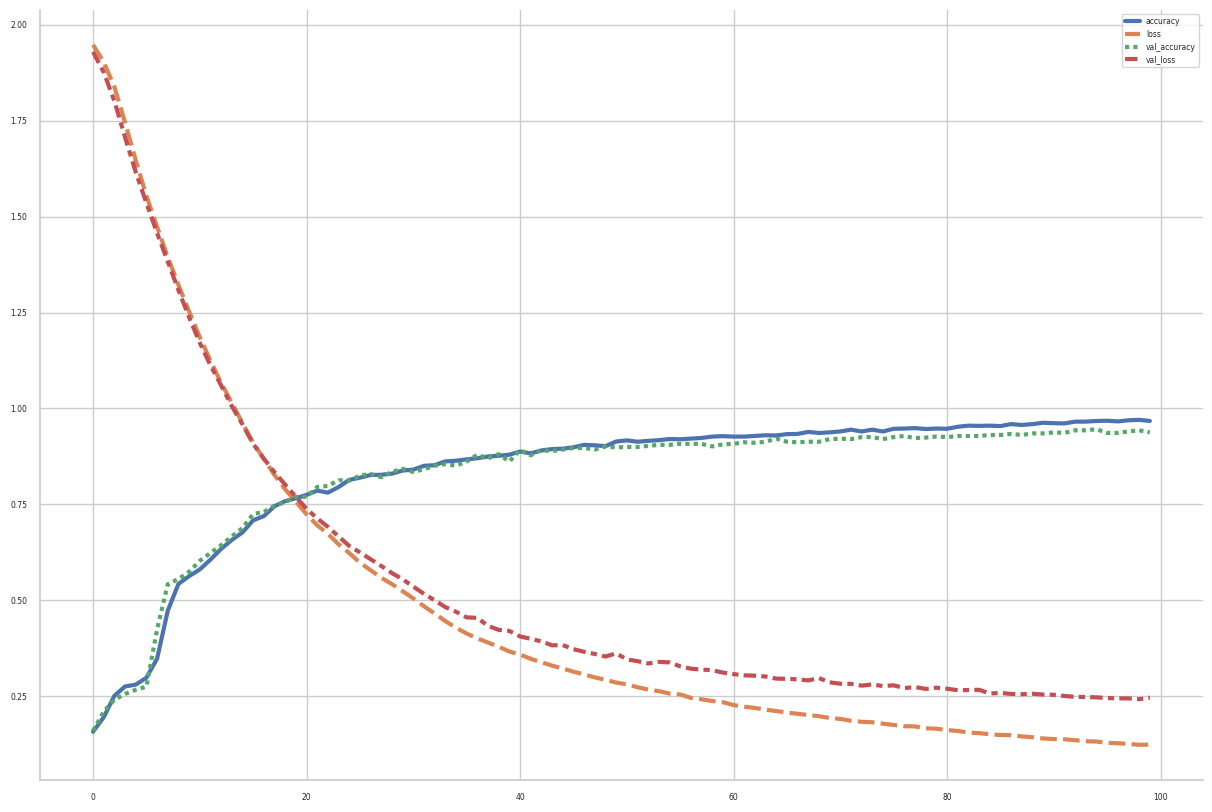

In [ ]:
ann, crtest_ros_ann, crtrain_ros_ann = ann_model(X_ros, y_ros_ann)
ann.save('ann.h5')

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.1482 - loss: 2.0668 - val_accuracy: 0.2220 - val_loss: 1.9271
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2402 - loss: 1.9131 - val_accuracy: 0.2413 - val_loss: 1.8665
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3118 - loss: 1.8280 - val_accuracy: 0.3706 - val_loss: 1.8054
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4180 - loss: 1.7687 - val_accuracy: 0.3759 - val_loss: 1.7364
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4205 - loss: 1.6814 - val_accuracy: 0.3864 - val_loss: 1.6557
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4428 - loss: 1.5888 - val_accuracy: 0.4091 - val_loss: 1.5655
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4462 - loss: 1.5224 - val_accuracy: 0.4213 - val_loss: 1.4858
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4710 - loss: 1.4001 - val_accuracy: 0.4580 - 

AttributeError: 'DataFrame' object has no attribute 'argmax'

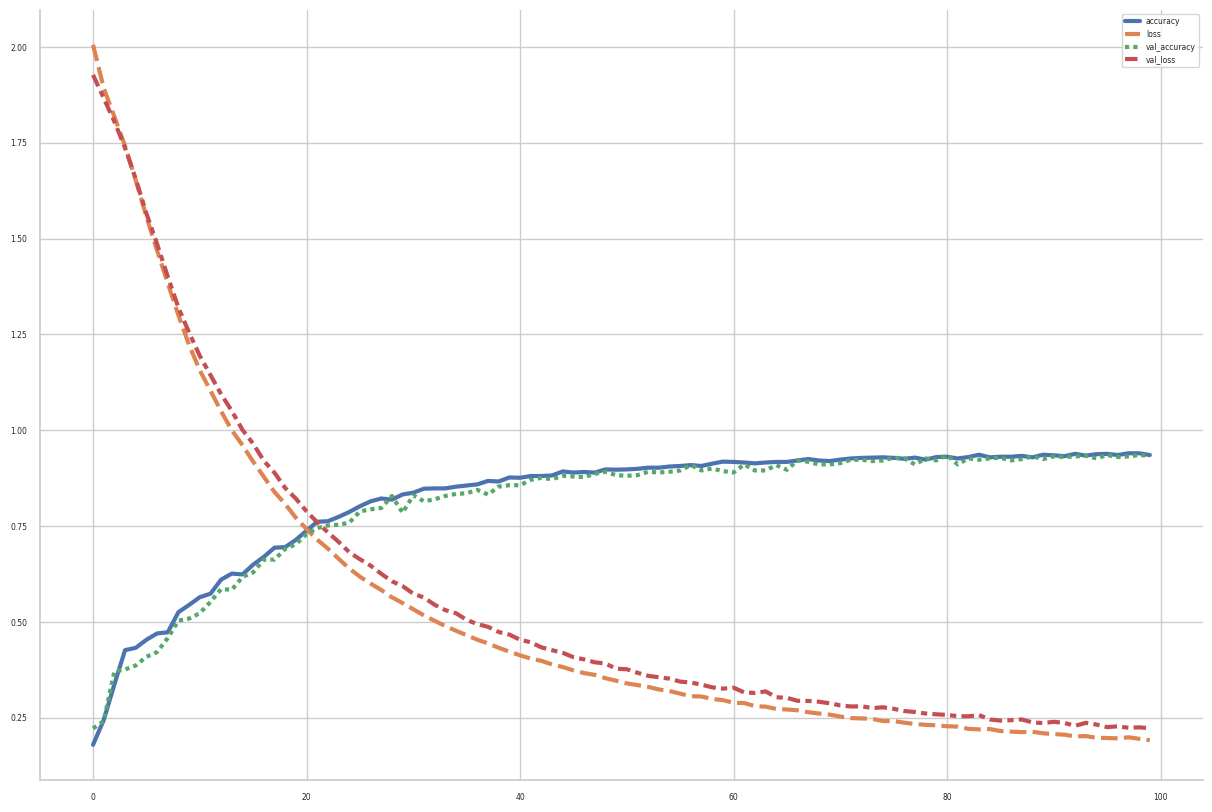

In [ ]:
ann, crtest_rus_ann, crtrain_rus_ann = ann_model(X_rus, y_rus_ann)

Epoch 1/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.1429 - loss: 1.9992 - val_accuracy: 0.1856 - val_loss: 1.8661
Epoch 2/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2094 - loss: 1.8389 - val_accuracy: 0.2317 - val_loss: 1.7607
Epoch 3/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2585 - loss: 1.7230 - val_accuracy: 0.4065 - val_loss: 1.6484
Epoch 4/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4156 - loss: 1.6219 - val_accuracy: 0.5095 - val_loss: 1.5256
Epoch 5/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4843 - loss: 1.4915 - val_accuracy: 0.5271 - val_loss: 1.4103
Epoch 6/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5070 - loss: 1.3754 - val_accuracy: 0.5447 - val_loss: 1.3053
Epoch 7/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5210 - loss: 1.2775 - val_accuracy: 0.5827 - val_loss: 1.2088
Epoch 8/100
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5563 - loss: 1.1793 - val_accuracy: 0.6057

AttributeError: 'DataFrame' object has no attribute 'argmax'

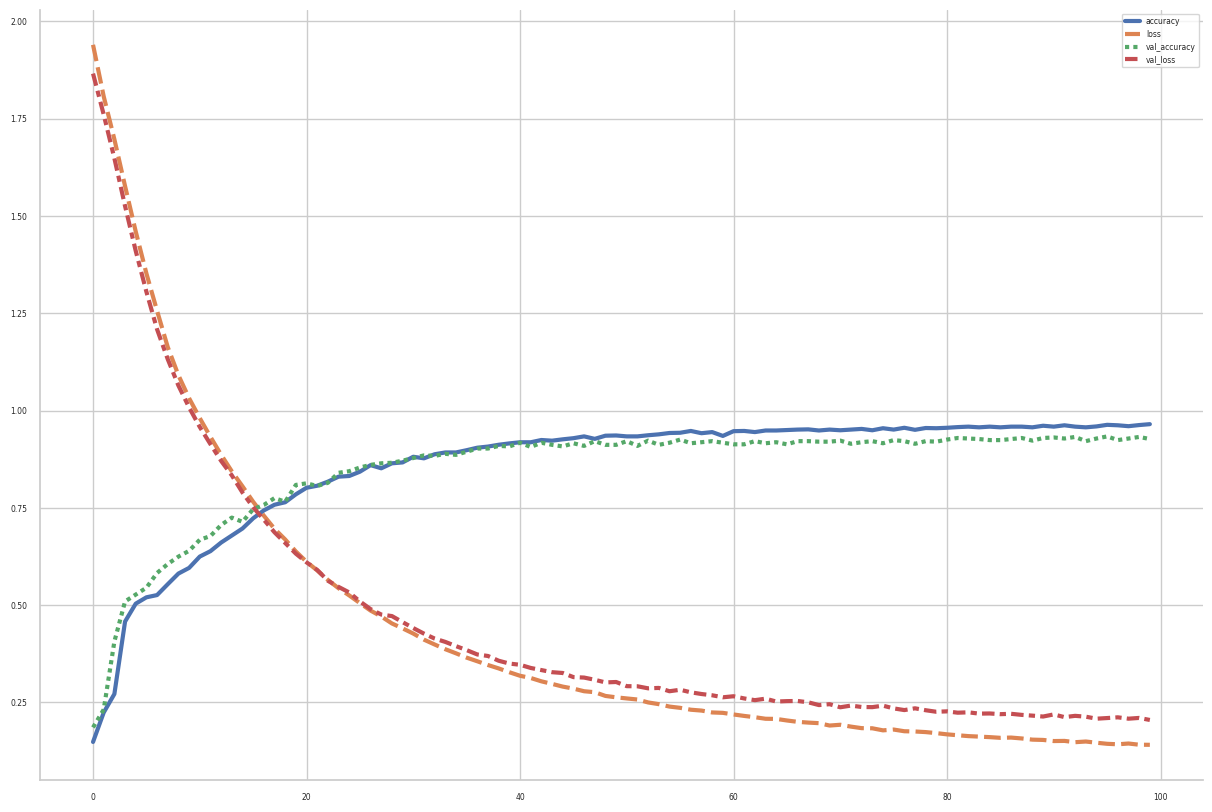

In [ ]:
ann, crtest_smote_ann, crtrain_smote_ann = ann_model(X_smote, y_smote_ann)

In [ ]:
ann.save('ann.h5')

NameError: name 'ann' is not defined